# MVD 2. Cvičení

Potřebné knihovny
- plotly
- matplotlib
- sklearn
- numpy
- pickle

## 1. část - Základní vizualizace dat

Úkolem v první části je vyzkoušet si základní vizualizaci s využitím knihoven Matplotlib a Plotly. Postačí vizualizovat základní sloupcový graf v každé z těchto knihoven s hodnotami [1, 2, 3].

## 2. část - Využití t-SNE knihovny pro redukci dimenze dat

V této části je úkolem redukovat dimenzi vstupních vektorů a poté je vizualizovat. Jedná se o tzv. vektory mluvčích (x-vektory), které se často využívají při verifikaci mluvčího. Pokud tyto vektory fungují správně, tak by z vizualizace mělo být vidět, že se vektory stejných osob shlukují a zároveň jsou dostatečně vzdálené od vektorů ostatních osob.

Je potřeba vyřešit následující úlohy:
1. Načíst data, která byla uložena jako tuple (data, Y) pomocí knihovny pickle
    - je potřeba binárně otevřít soubor data.pk a správně načíst data
    - "data" ... jedná se o list obsahující vektory 5 osob, celková velikost je (25, 128)
        - v Y jsou labely osob pro jednotlivé vektory (0,0,0,0,0,1,1,1,1,1,2,2,...)
        
        
2. Použít t-SNE pro redukci dimenze dat do 2D (již naimportovaná knihovna), doporučuji přečíst si dokumentaci a podívat se na použití


3. Vizualizovat vektory ve 2D s použitím plotly knihovny, graf stačí zobrazit zde v notebooku


### Výsledek by měl vypadat přibližně takto
![output](sample_output.png)

In [56]:
from sklearn.manifold import TSNE
import pickle as pk
import matplotlib.pyplot as plt
import pandas as pd
import re
import plotly.express as px


In [3]:
# Načtení dat
with open('data.pk', 'rb') as file:
    data = pk.load(file)

In [78]:
vec,y = [data[0],data[1]]

In [81]:
tsne = TSNE(n_components=2, perplexity=5,random_state=1).fit_transform(vec) #7

# plt.scatter(tsne[:, 0], tsne[:, 1], c=y)
# plt.show()
plot = px.scatter(tsne[:, 0], tsne[:, 1], color=['osoba ' + str(x)  for x in y])
plot.update_coloraxes(showscale=False)
plot.show()

C:\Users\podav\anaconda3\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\podav\anaconda3\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



## 3. část - Vizualizace libovolného datasetu

Poslední úloha je více otevřená. Můžete použít libovolný dataset a vytvořit libovolné vizualizace (alespoň 2).

Čerpat můžete z vlastního zdroje nebo např.:
- [Stanford Large Network Dataset Collection](http://snap.stanford.edu/data/index.html)
- [UCI Network Data Repository](https://networkdata.ics.uci.edu/)

Pokud vytvoříte složitější vizualizaci, nebo provedete zajímavou analýzu datasetu, tak můžete získat bonusový bod.

In [82]:
# složitější vizualizace --- alespoň nějaká z pokročilejších metod, nebo zajímavá analýza dat

#Načtení datasetu

df = pd.read_csv("netflix_titles.csv", sep=';')
df

,show_id,type,title,date_added,release_year,duration,listed_in
0,s1,TV Show,3%,14.08.2020,2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,23.12.2016,2016,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,20.12.2018,2011,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,16.11.2017,2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,01.01.2020,2008,123 min,Dramas
...,...,...,...,...,...,...,...
7762,s7783,Movie,Zozo,19.10.2020,2005,99 min,"Dramas, International Movies"
7763,s7784,Movie,Zubaan,02.03.2019,2015,111 min,"Dramas, International Movies, Music & Musicals"
7764,s7785,Movie,Zulu Man in Japan,25.09.2020,2019,44 min,"Documentaries, International Movies, Music & M..."
7765,s7786,TV Show,Zumbo's Just Desserts,31.10.2020,2019,1 Season,"International TV Shows, Reality TV"


array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

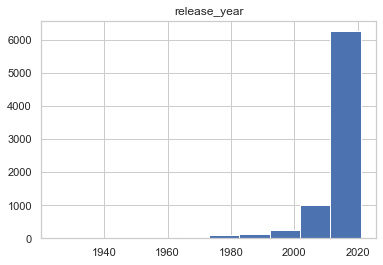

In [83]:
df.release_year
df.hist(column='release_year')

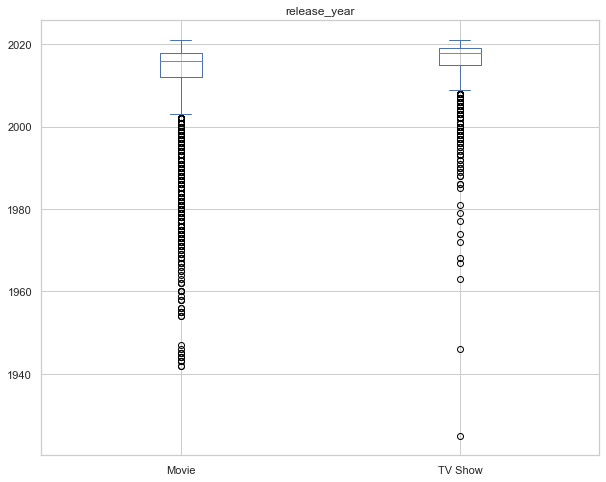

In [84]:
#Průměrný rok vydání pro filmy či seriály
rl = df.groupby(['type']).mean()
ax = df.plot.box(column="release_year", by="type", figsize=(10, 8))

In [85]:
s = []
f =[]
for item in df['duration']:
    if item.__contains__('Season'):
        s.append(int(re.findall("\d+",item )[0]))
    else:
        f.append(int(re.findall("\d+",item )[0]))

In [86]:
ss = pd.Series(s)
fs = pd.Series(f)

<AxesSubplot:ylabel='Density'>

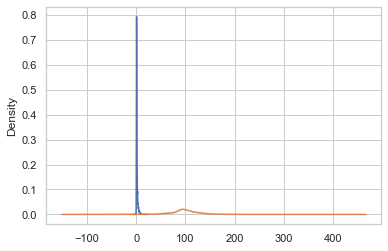

In [87]:
ss.plot.kde()
fs.plot.kde()

<AxesSubplot:ylabel='release_year'>

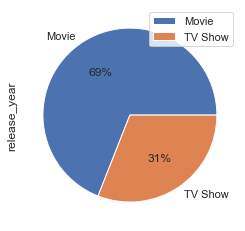

In [90]:
df.groupby(['type']).sum().plot(kind='pie', y='release_year', autopct='%1.0f%%')

In [96]:
spicies = df.listed_in.str.split(',', 2, expand=True)
theta = spicies[0].unique()

ValueError: All arguments should have the same length. The length of argument `theta` is 36, whereas the length of  previously-processed arguments ['r'] is 7767

In [98]:
df = df.assign(genre=spicies[0])
fig = px.bar(df, x='', y="count", color="nation", text_auto=True)

,show_id,type,title,date_added,release_year,duration,listed_in,genre
0,s1,TV Show,3%,14.08.2020,2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",International TV Shows
1,s2,Movie,7:19,23.12.2016,2016,93 min,"Dramas, International Movies",Dramas
2,s3,Movie,23:59,20.12.2018,2011,78 min,"Horror Movies, International Movies",Horror Movies
3,s4,Movie,9,16.11.2017,2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",Action & Adventure
4,s5,Movie,21,01.01.2020,2008,123 min,Dramas,Dramas
...,...,...,...,...,...,...,...,...
7762,s7783,Movie,Zozo,19.10.2020,2005,99 min,"Dramas, International Movies",Dramas
7763,s7784,Movie,Zubaan,02.03.2019,2015,111 min,"Dramas, International Movies, Music & Musicals",Dramas
7764,s7785,Movie,Zulu Man in Japan,25.09.2020,2019,44 min,"Documentaries, International Movies, Music & M...",Documentaries
7765,s7786,TV Show,Zumbo's Just Desserts,31.10.2020,2019,1 Season,"International TV Shows, Reality TV",International TV Shows
